In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('/home/sunbeam/Documents/ML/ml-o-02-data/ML-02-master/day09/heart_disease.csv')

In [2]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
for i in df.columns:
    print("-"*30)
    print("for",i,"corr coff is")
    print(np.corrcoef(df[i],df['target']))

------------------------------
for age corr coff is
[[ 1.         -0.22543872]
 [-0.22543872  1.        ]]
------------------------------
for sex corr coff is
[[ 1.         -0.28093658]
 [-0.28093658  1.        ]]
------------------------------
for cp corr coff is
[[1.         0.43379826]
 [0.43379826 1.        ]]
------------------------------
for trestbps corr coff is
[[ 1.         -0.14493113]
 [-0.14493113  1.        ]]
------------------------------
for chol corr coff is
[[ 1.         -0.08523911]
 [-0.08523911  1.        ]]
------------------------------
for fbs corr coff is
[[ 1.         -0.02804576]
 [-0.02804576  1.        ]]
------------------------------
for restecg corr coff is
[[1.        0.1372295]
 [0.1372295 1.       ]]
------------------------------
for thalach corr coff is
[[1.         0.42174093]
 [0.42174093 1.        ]]
------------------------------
for exang corr coff is
[[ 1.         -0.43675708]
 [-0.43675708  1.        ]]
------------------------------
for old

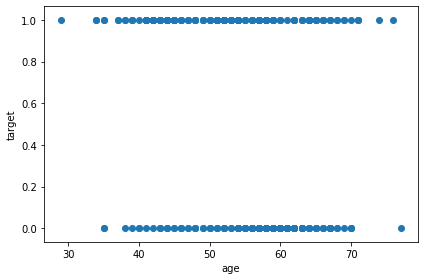

In [5]:
plt.scatter(df['age'], df['target'])
plt.xlabel('age')
plt.ylabel('target')
plt.tight_layout()
plt.show()

In [6]:
x = df.drop(['chol', 'fbs', 'target'], axis=1)
y = df['target']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12345)

# build the model
classifier = LogisticRegressionCV(max_iter=1000)
classifier.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [9]:
classifier.score(x_test, y_test)

0.8032786885245902

In [12]:
# get the predictions
y_predictions = classifier.predict(x_test)
print(y_predictions)
print(y_test)

[0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0]
184    0
75     1
10     1
101    1
240    0
      ..
100    1
151    1
291    0
47     1
18     1
Name: target, Length: 61, dtype: int64


In [13]:
# create the confusion matrix
matrix = confusion_matrix(y_test, y_predictions)
matrix

array([[20,  5],
       [ 7, 29]])

In [19]:
total = matrix.sum()
correct = matrix[0][0] + matrix[1][1]
accuracy = (correct/total)
print(f"accuracy = {accuracy * 100:0.2f} %")

accuracy = 80.33 %


In [23]:
x_test

age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  thal
184   50    1   0       150        0      128      0      2.6      1   0     3
75    55    0   1       135        0      161      0      1.4      1   0     2
10    54    1   0       140        1      160      0      1.2      2   0     2
101   59    1   3       178        0      145      0      4.2      0   0     3
240   70    1   2       160        1      112      1      2.9      1   1     3
..   ...  ...  ..       ...      ...      ...    ...      ...    ...  ..   ...
100   42    1   3       148        0      178      0      0.8      2   2     2
151   71    0   0       112        1      125      0      1.6      1   0     2
291   58    1   0       114        2      140      0      4.4      0   3     1
47    47    1   2       138        0      156      0      0.0      2   0     2
18    43    1   0       150        1      171      0      1.5      2   0     2

[61 rows x 11 columns]

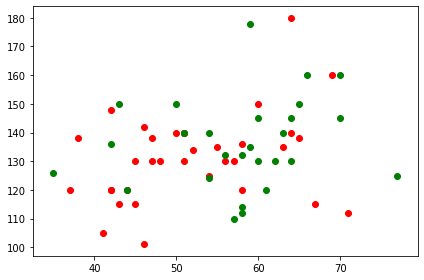

In [21]:
# data visualization
plt.scatter(x_test['age'][y_predictions == 1], x_test['trestbps'][y_predictions == 1], color="red")
plt.scatter(x_test['age'][y_predictions == 0], x_test['trestbps'][y_predictions == 0], color="green")
plt.tight_layout()
plt.show()